# Cellular Automata: Task 1.1

The code in this file is for generating a simple cellular automata of variable length.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

import seaborn as sns
sns.set(palette="bright")
plt.style.use('seaborn-pastel')

In [47]:
def cellular_step(states, rule_number):
    """Applies the specified rule number to the list of states by converting it into binary,
    and using the the 3 bit integer associated with every neighborhood of cells in the 
    list, indexes the appropriate state change from the binary rule number. Classically
    the leading digits in the binary representation of the rule number correspond to state
    changes in the largest integers associated with the state neighborhoods (for instance 
    the left most digit would be the state change for the neighborhood 111, associated with 
    the integer 7), so as larger indexes relate to items further right in an array we invert
    the binary representation of the rule_number.
    
    Arguments:
    states -- a row of states associated for a cellular automaton
    rule_number -- an 8 bit integer associated with a way of obtaining the next
                    state for each cell in states using the values of its neighbors
                    
    Returns:
    states -- the new generation of the states after applying the transition rule
    """
    
    # Turns the integer rule number into an 8 bit binary number, and reverses its order
    transition_rule = np.unpackbits( np.uint8(rule_number) )[::-1]
    
    # Initializes an array for storing the index associated to the transition of each cell
    indices = np.zeros(len(states), dtype = np.uint8)
    
    # Determines the index in the transition rule for each cell in the list of states
    for i in range(len(states)):
        # Converts the triple of ones and zeros associated to any state neighborhood into 
        # a base ten integer. Uses mod len(states) so that the cells on the edges loop around
        # when looking at their neighbors
        indices[i] = states[(i-1) % len(states)]*4+states[i % len(states)]*2 + states[(i+1)%len(states)]
        
        

    # Applies the transition rule to each state using its calculated index
    states = transition_rule[ indices ]

    return states

In [48]:
def run_automaton(rule_number, ngens, ncells):
    """Runs the given rule number on a collection of cells
    of length ncells a specified number of times, and returns
    a grid containing each generation.
    """
    
    # Initializes row of states with a one in the center
    states = np.zeros(ncells, dtype = np.uint8)
    states[len(states)//2] = 1
    
    # Creates a grid for storing the various generations of the cells
    grid = np.zeros((ngens, ncells), dtype = np.uint8)
    grid[1,:] = states
    
    # For each grid, updates the cell states with some cellular_step function and the given rule number
    for i in range(1,ngens):
        states = cellular_step(states, rule_number)
        grid[i,:] = states
    
    return grid

In [49]:
def plot_automatonGrid(grid, rule_number, max_cell = 200):
    """Plots a grid containing the states of a cellular automaton 
    which evolved according to the given rule number.
    """
    
    # Plots and labels the grid of generations for the state transition associated with the rule number.
    plt.figure(figsize = (10,10)) 
    plt.imshow(grid.T)
    plt.grid(False)
    plt.xlim(0, max_cell)
    plt.xlabel("Cell number")
    plt.ylabel("Generation number")
    plt.title("CA Rule {}".format(rule_number))

In [50]:
def main_automaton(rule_number = 1, ngens = 999, ncells = 64):
    """Obtains and plots the generations of a 1D-cellular automaton for a given rule number"""
    
    # Obtains the grid of state generations for the automaton
    grid = run_automaton(rule_number, ngens, ncells)
    
    # Plots the grid
    plot_automatonGrid(grid, rule_number)

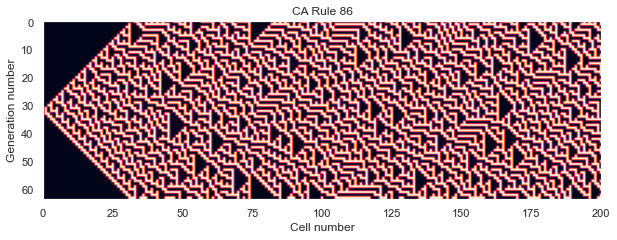

In [51]:
# Generates 360 generations of a 420 cell automaton using rule 86, and plots the result
main_automaton(rule_number = 86)

In [52]:
def animate(i, rule_number, ngens, im):
    """Moves the current states in the grid last displayed to the screen
    up one row, and adds the new state row at the bottom of the grid
    before replacing the animation image by it."""
    
    # Obtains the current frame grid
    grid = im.get_array()
    
    # Obtains the most recent state at the bottom of the grid
    states = grid[-1,:]
    
    # Obtains the next generation of the cellular automaton
    states = cellular_step(states, rule_number)
    
    # Moves the states up one row, and adds the new row of states at the bottom
    grid[0:ngens-1,:] = grid[1:ngens,:]
    grid[-1,:] = states
    
    # Sets the array in im to the new grid, and returns the object
    im.set_array(grid)
    return [im]

In [53]:
def initialize(ncells, ngens, rule_number):
    """Initializes a grid of generations, with the first state at
    the bottom for animation purposes."""
    
    # Initializes row of states with a one in the center
    states = np.zeros(ncells, dtype = np.uint8)
    states[len(states)//2] = 1
    
    # Creates a grid for storing the various generations of the cells
    grid = np.zeros((ngens, ncells), dtype = np.uint8)
    grid[-1,:] = states
    
    return grid

In [54]:
def animate_evolution(ncells, ngens, rule_number):
    """Animates the evolution of a 1D cellular automaton"""
    
    # Set up the figure 
    fig = plt.figure(figsize = (10,10))
    plt.grid(False)
    
    # Initializes the grid for the first frame of animation
    grid = initialize(ncells, ngens, rule_number)
    
    # Turns the grid into an animatable object for plotting 
    im = plt.imshow(grid, animated = True)

    # Generates an animation using the animate function
    anim = animation.FuncAnimation(fig, animate, fargs = (rule_number, ngens, im), frames=200, interval=20, blit=True)
    plt.show()
    return anim

<IPython.core.display.Javascript object>


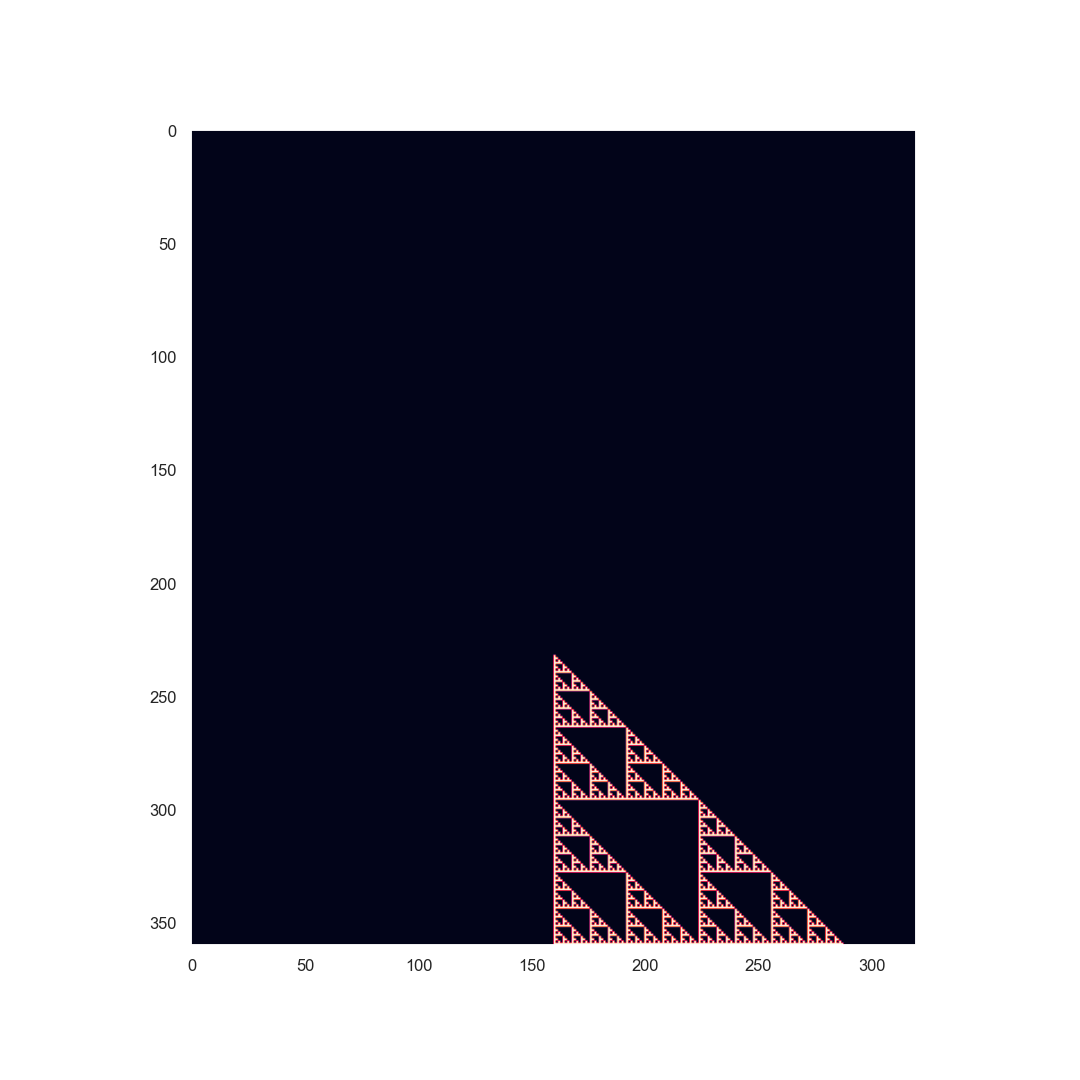

In [57]:
# Set up the figure 
ncells = 320
ngens = 360
rule_number = 60
# Animates a 320 cell automaton on a grid displaying 360 generations, using rule number 60
animate_evolution(ncells, ngens, rule_number)